# Labs Access Analysis: 02 Stats Plot

## Setup

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import os
import time
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# Change the font
sns.set_context("poster", font_scale=1.5)
sns.set_style(style="whitegrid")
matplotlib.rc('font', family='serif', serif='Fira Sans')

## Data investigation

In [6]:
url_data_labs = "https://openp2pdesign.github.io/labs_access_analysis/data/labs.csv"

##REMOVE this line when you are ready to publish the data
url_data_labs = "data/labs.csv"

In [22]:
# create the directory with the data
if not os.path.exists('data'):
    os.makedirs('data') 
# create the directory where store the svg files
if not os.path.exists('svg'):
    os.makedirs('svg') 
# create the directory with the png files
if not os.path.exists('png'):
    os.makedirs('png')

load the data

In [11]:
data = pd.read_csv(url_data_labs)

show the first 5 rows

In [12]:
data.head(5)

,Name,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes
0,Fab Lab Barcelona,Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN
1,MADE Makerspace Barcelona,Fab Lab,Barcelona,BCN,Carrer Noguera Pallaresa 59-61,8014.0,41.373238,2.141084,"Fablabs.io, Hackerspaces.org, Makerspaces.make.co",NaN,NaN
2,Soko Tech,Fab Lab,Barcelona,BCN,"Carrer de Vallès i Ribot, 36",8027.0,41.424535,2.188883,Fablabs.io,https://soko.tech/,NaN
3,LSCongres,Fab Lab,Barcelona,BCN,"Carrer del Cardenal Tedeschini, 50",8027.0,41.426002,2.182026,Fablabs.io,https://fablabs.io/labs/lscongres,NaN
4,Green Fab Lab,Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.450394,2.133441,Fablabs.io,NaN,NaN


### description of the fields of the dataset
|  field name | description | details   |
|---|---|---|
| Name | name of the lab | |
| Type | type of Fablab. | *Fab Lab, Service, Makerspace, DIYBio Lab, Ateneu de Fabricació, City Space, Library, FabCafè, Incubator/Accelerator. Foundation* | 
| Cluster | which cluster the lab belongs to (Barcelona or Milan) | *BCN, MI* |
| Address | The house number where the lab is located | |
| CAP | the zipcode of the address | | 
| Lat | the latitude expressed in decimal degree | | 
| Long | the longitude expressed in decimal degree | |
| Source | where the information was collected from | *fablabs.io, hackerspaces.org, makerspaces.make.co, ajuntament.barcelona.cat, sphere.diybio.org, manually added, ajuntament de Barcelona policy document* | 
| URL | the web address of the lab | | 
| Notes | some information notes.  |the only note is if the lab has been closed (*Closed*), otherwise nothing appears. | 

### data investigation

In [14]:
data["Notes"].describe()

count          6
unique         1
top       Closed
freq           6
Name: Notes, dtype: object

In [15]:
data["Notes"].value_counts()

Closed    6
Name: Notes, dtype: int64

### Analysis - Type of Labs

In [16]:
data["Type"].describe()

count          68
unique         12
top       Fab Lab
freq           19
Name: Type, dtype: object

In [17]:
data["Type"].value_counts()

Fab Lab                  19
Makerspace               11
City Space                7
Hackerspace               6
Ateneu de Fabricació      6
Service                   4
University Lab            4
Incubator/Accelerator     4
DIYBio Lab                3
Foundation                2
Library                   1
FabCafé                   1
Name: Type, dtype: int64

plot the data

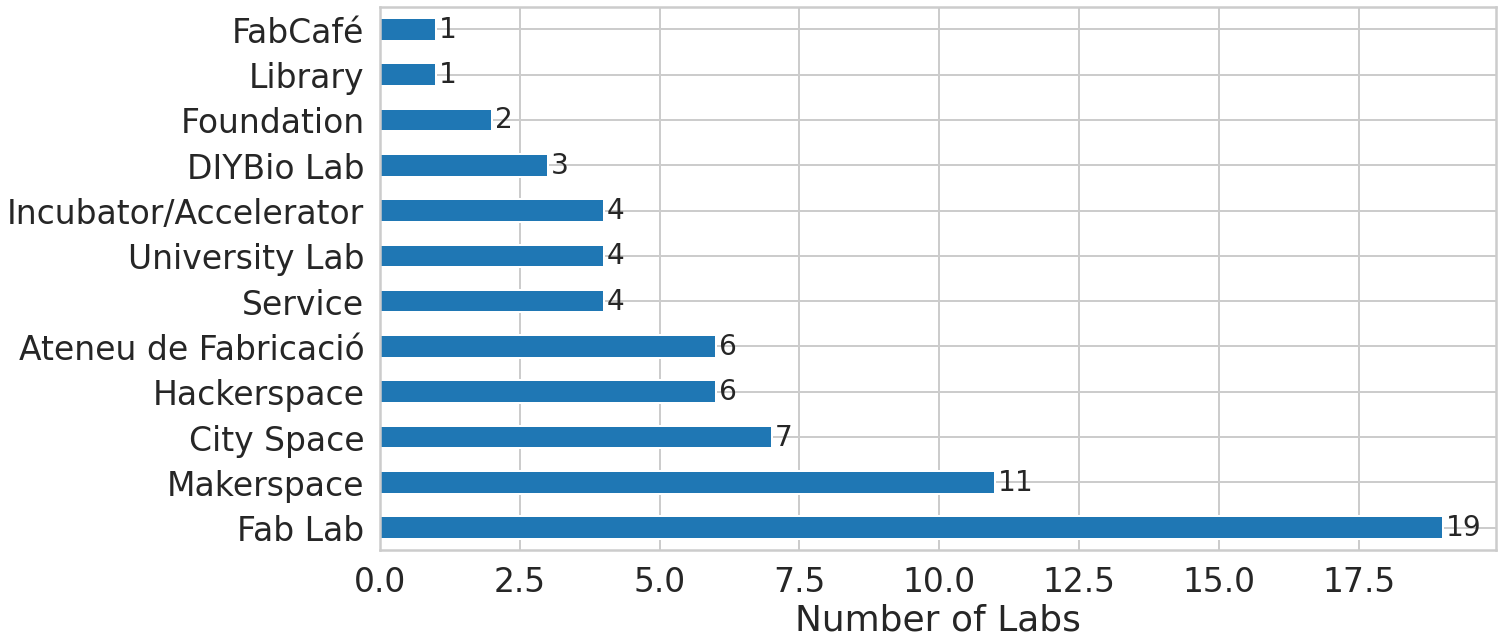

In [24]:
ax = data["Type"].value_counts().plot(kind="barh", figsize=(20,10))
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
plt.xlabel('Number of Labs')
plt.savefig("svg" + os.sep + "labs_type.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_type.png", dpi=300, bbox_inches="tight")

### Analysis - Cities

In [25]:
data["Cluster"].describe()

count      68
unique      2
top       BCN
freq       46
Name: Cluster, dtype: object

In [26]:
data["Cluster"].value_counts()

BCN    46
MI     22
Name: Cluster, dtype: int64

plot the data

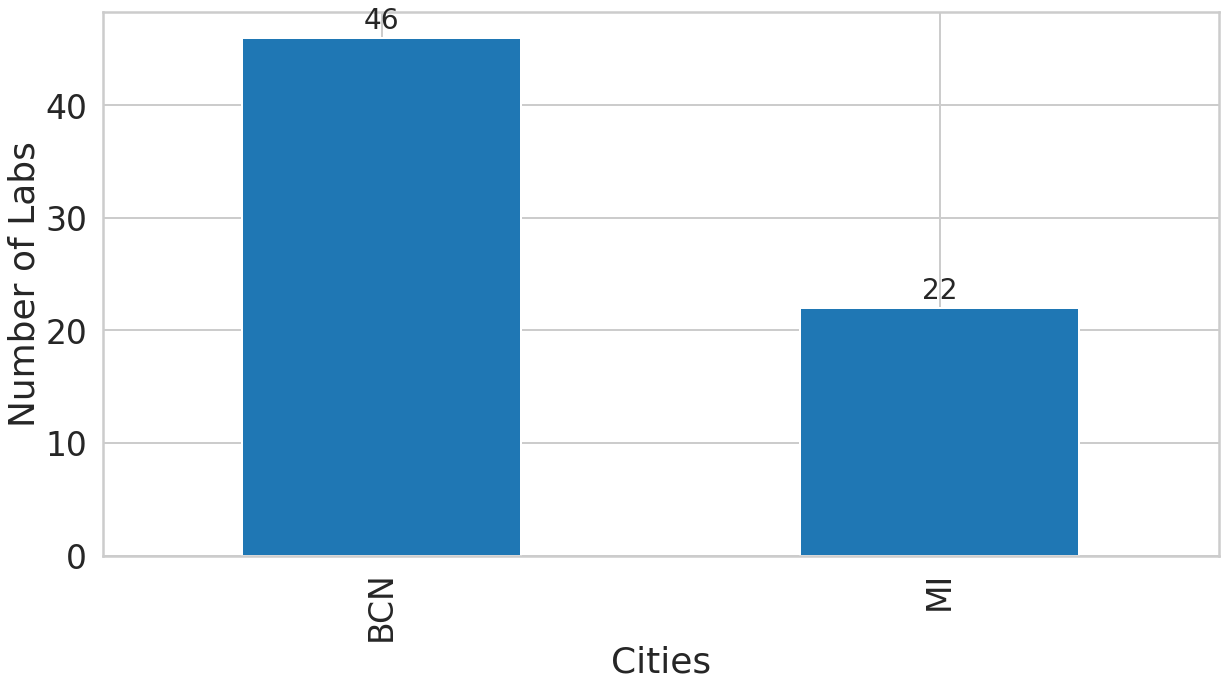

In [27]:
ax = data["Cluster"].value_counts().plot(kind="bar", figsize=(20,10))
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
plt.xlabel('Cities')
plt.ylabel('Number of Labs')
plt.savefig("svg" + os.sep + "labs_cluster.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_cluster.png", dpi=300, bbox_inches="tight")

### Labs Type by Cluster (City)

In [29]:
gp = data.groupby('Cluster')
gp["Type"].sum()

Cluster
BCN    Fab LabFab LabFab LabFab LabFab LabFab LabFab ...
MI     Fab LabFab LabServiceFab LabMakerspaceFab LabU...
Name: Type, dtype: object

In [30]:
data.groupby(['Cluster','Type']).size()

Cluster  Type                 
BCN      Ateneu de Fabricació      6
         City Space                7
         DIYBio Lab                2
         Fab Lab                  11
         FabCafé                   1
         Foundation                2
         Hackerspace               4
         Incubator/Accelerator     3
         Library                   1
         Makerspace                5
         Service                   1
         University Lab            3
MI       DIYBio Lab                1
         Fab Lab                   8
         Hackerspace               2
         Incubator/Accelerator     1
         Makerspace                6
         Service                   3
         University Lab            1
dtype: int64

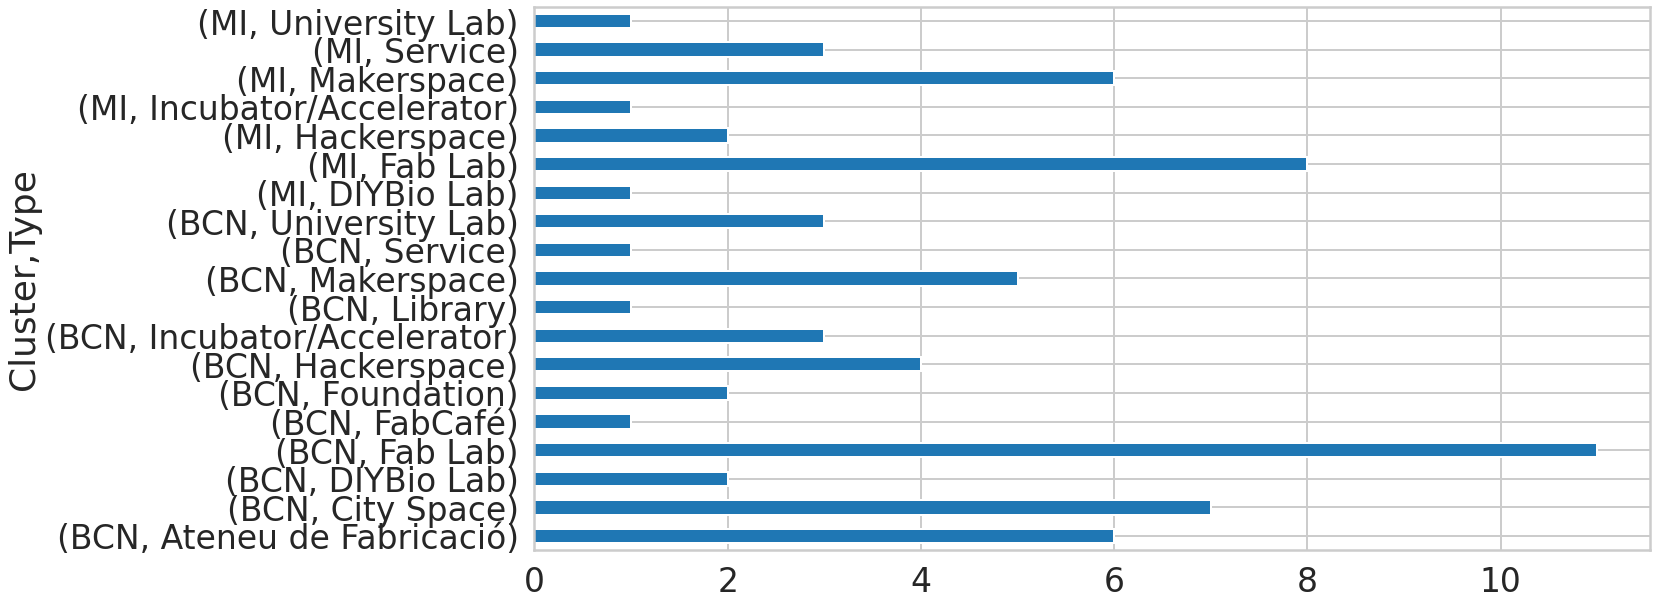

In [32]:
data.groupby(['Cluster','Type']).size().plot(kind="barh", figsize=(20,10))
plt.show()

plot the data

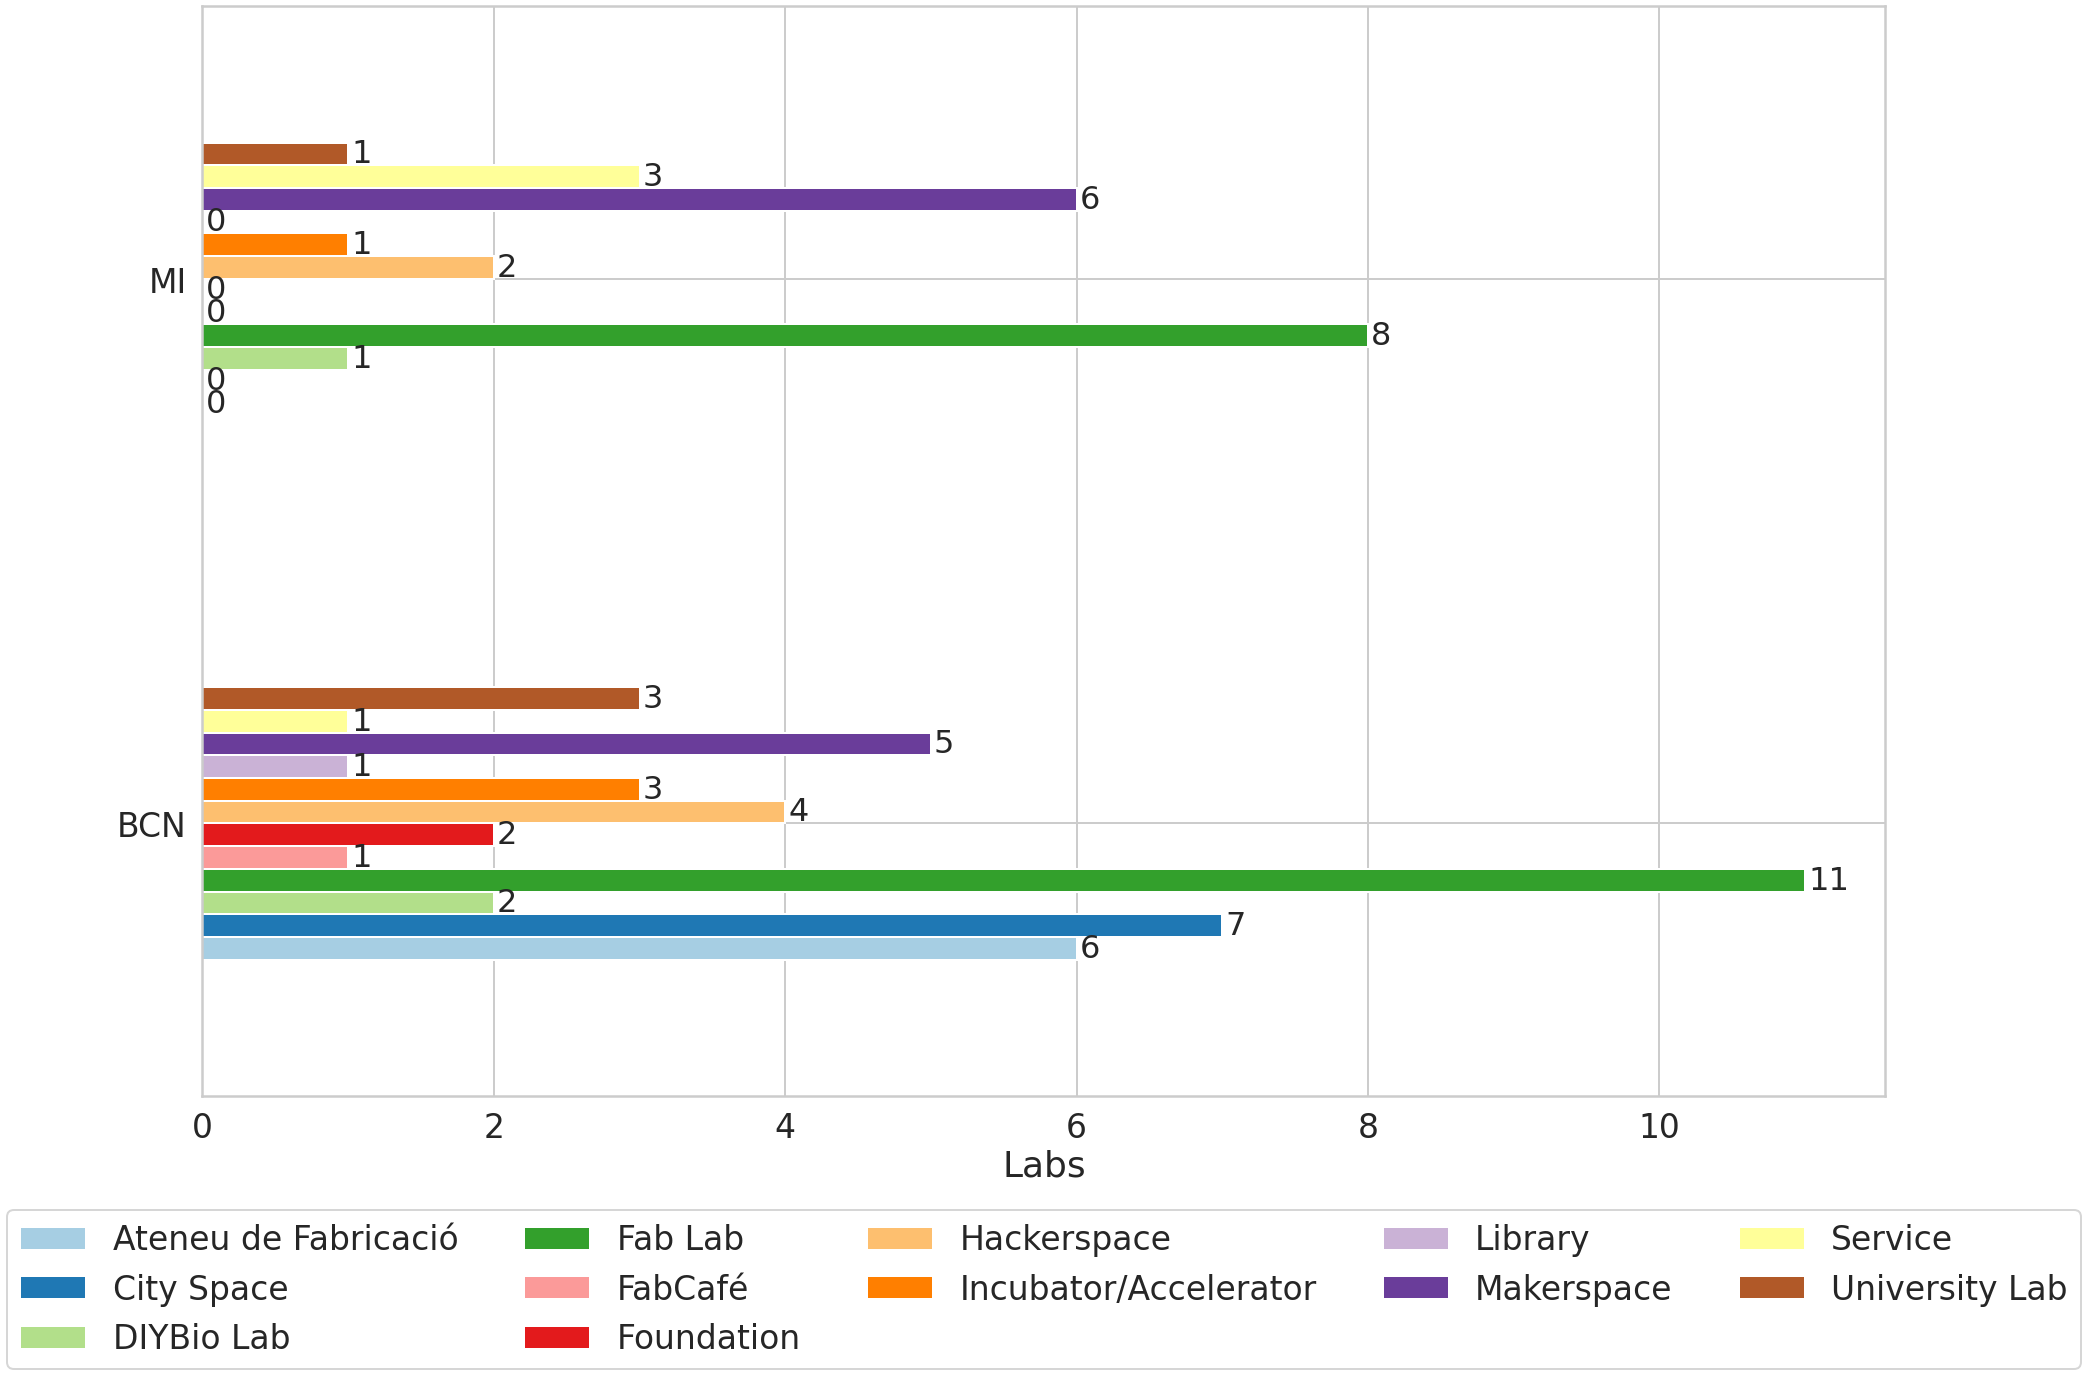

In [34]:
ax = data.groupby(['Cluster','Type']).size().unstack().plot(kind='barh', figsize=(30,20), color=sns.color_palette("Paired", len(data.groupby(['Cluster','Type']))))
for xx in ax.containers:
    ax.bar_label(xx, fmt="%d", size=32, padding=3)
plt.xlabel('City')
plt.xlabel('Labs')
ax.set_ylabel('')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), ncol=5)
plt.tight_layout()
plt.savefig("svg" + os.sep + "labs_cluster.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_cluster.png", dpi=300, bbox_inches="tight")

two plots together

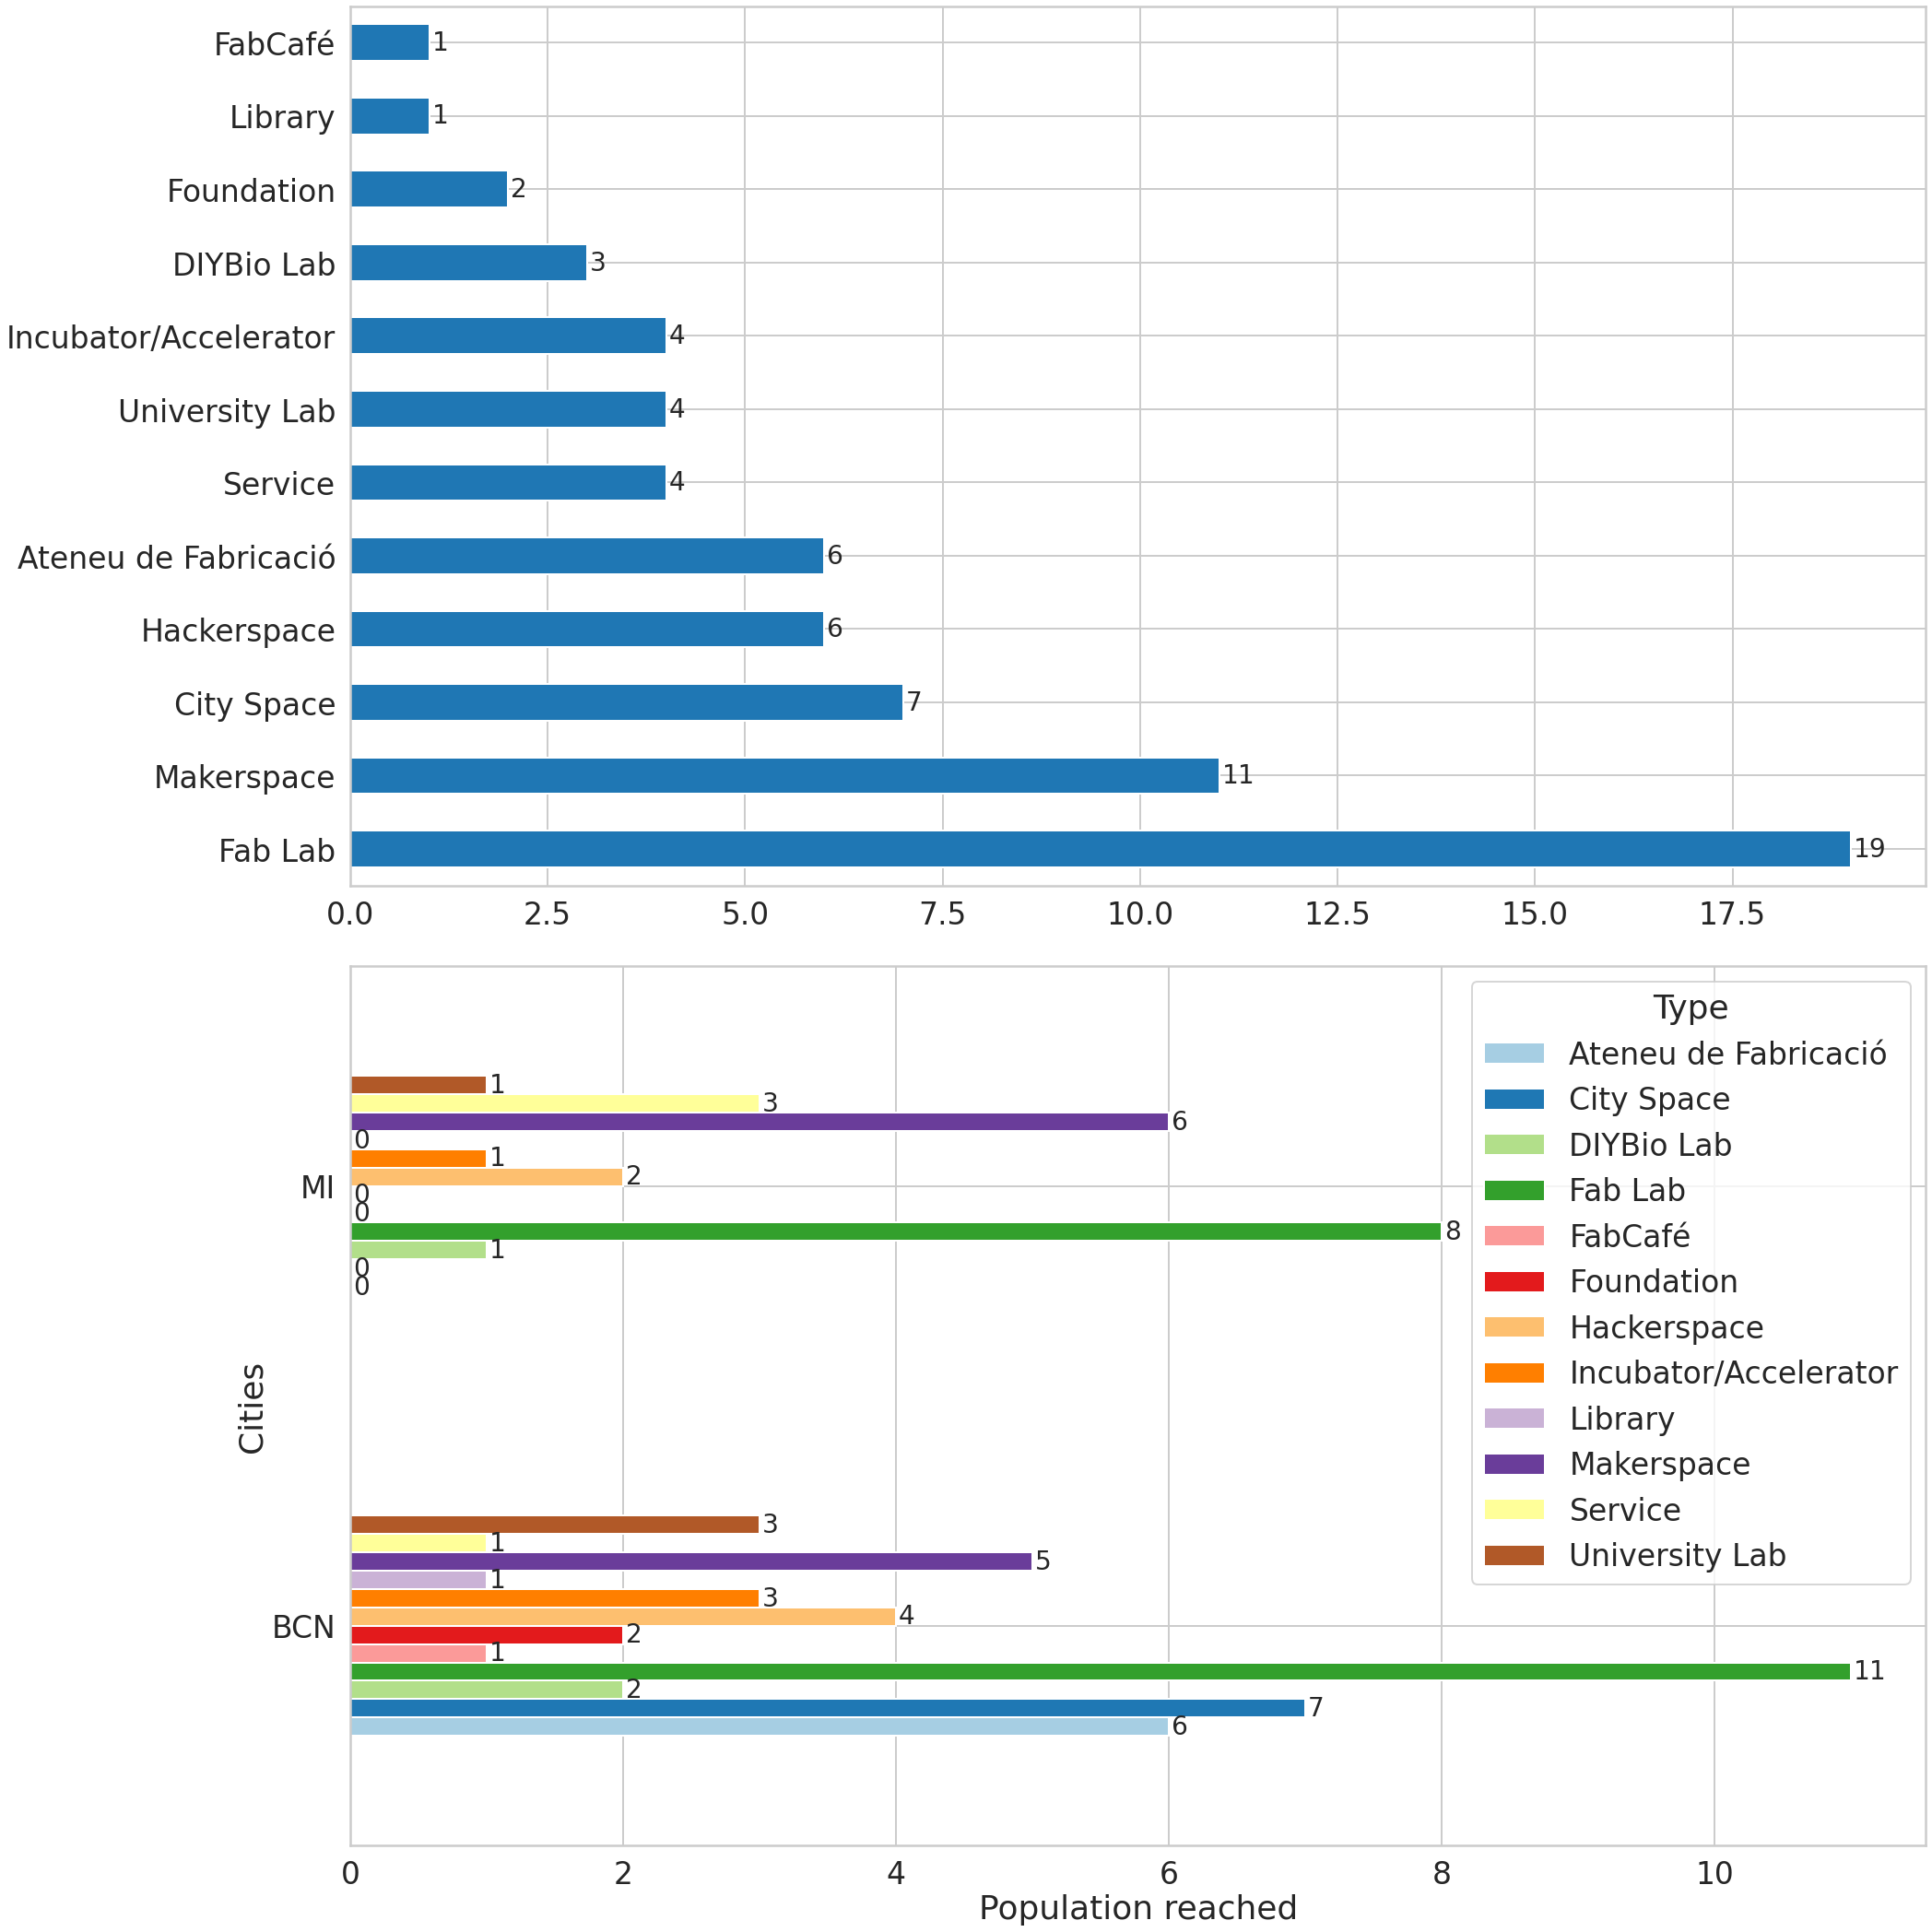

In [36]:
figure, axes = plt.subplots(2, 1, figsize=(30,30))
data["Type"].value_counts().plot(ax=axes[0], kind="barh", legend=False)
axes[0].bar_label(axes[0].containers[0], fmt="%d", size=28, padding=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('')

data.groupby(['Cluster','Type']).size().unstack().plot(ax=axes[1], kind="barh", color=sns.color_palette("Paired", len(data.groupby(['Cluster','Type']))))
for xx in axes[1].containers:
    axes[1].bar_label(xx, fmt="%d", size=28, padding=3)
#plt.xlabel('City')
#plt.xlabel('Labs')

axes[1].set_xlabel('Population reached')
axes[1].set_ylabel('Cities')

#axes[1].legend(loc='upper center', bbox_to_anchor=(0.05, -0.09), ncol=5)


plt.tight_layout()
plt.savefig("png" + os.sep + "labs_esp_ita_number_subplot.png", dpi=300, bbox_inches='tight')
plt.savefig("svg" + os.sep + "labs_esp_ita_number_subplot.svg", bbox_inches='tight')